### 01. 정형 데이터마이닝

##### Titanic 데이터는 타이타닉호의 탑승자들의 생존에 관련한 데이터이다. 데이터에 대한 설명은 아래와 같다.

 	
<table>
	<thead>
		<tr>
			<th>변수	데이터</th>
			<th>형태</th>
			<th>설명</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>pclass</td>
			<td>수치형</td>
			<td>1, 2, 3등석 정보를 각각 1, 2, 3으로 저장</td>
		</tr>
		<tr>
			<td>survived</td>
			<td>범주형</td>
			<td>생존 여부(0: 사망, 1: 생존)</td>
		</tr>
		<tr>
			<td>name</td>
			<td>문자형</td>
			<td>이름</td>
		</tr>
		<tr>
			<td>sex</td>
			<td>범주형</td>
			<td>성별</td>
		</tr>
		<tr>
			<td>age</td>
			<td>수치형</td>
			<td>나이</td>
		</tr>
		<tr>
			<td>sibsp</td>
			<td>수치형</td>
			<td>함께 탑승한 형제 또는 배우자의 수</td>
		</tr>
		<tr>
			<td>parch</td>
			<td>수치형</td>
			<td>함께 탑승한 형제 또는 자녀의 수</td>
		</tr>
		<tr>
			<td>ticket</td>
			<td>문자형</td>
			<td>티켓번호</td>
		</tr>
		<tr>
			<td>fare</td>
			<td>수치형</td>
			<td>티켓요금</td>
		</tr>
		<tr>
			<td>cabin</td>
			<td>문자형</td>
			<td>선실번호</td>
		</tr>
		<tr>
			<td>embarked</td>
			<td>범주형</td>
			<td>탑승한 곳(C: Cherbourg, Q: Queenstown, S: Southampton)</td>
		</tr>
	</tbody>
</table>

#### 1. cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸고 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age 변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

<table>
	<thead>
		<tr>
			<th>범주</th>
			<th>범위</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>0</td>
			<td>0 이상 10 미만</td>
		</tr>
		<tr>
			<td>10</td>
			<td>10 이상 20 미만</td>
		</tr>
		<tr>
			<td>20</td>
			<td>20 이상 30 미만</td>
		</tr>
		<tr>
			<td>30</td>
			<td>30 이상 40 미만</td>
		</tr>
		<tr>
			<td>40</td>
			<td>40 이상 50 미만</td>
		</tr>
		<tr>
			<td>50</td>
			<td>50 이상 60 미만</td>
		</tr>
		<tr>
			<td>60</td>
			<td>60 이상 70 미만</td>
		</tr>
		<tr>
			<td>70</td>
			<td>70 이상 80 미만</td>
		</tr>
		<tr>
			<td>80</td>
			<td>80 이상 90 미만</td>
		</tr>
	</tbody>
</table>

In [170]:
import pandas as pd

df = pd.read_csv("data/모의고사 2회/titanic.csv", encoding="utf-8")

In [171]:
#cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸시오
# df["cabin"].fillna("NA", inplace=True)
# df["embarked"].fillna("NA", inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [172]:
#수치형 변수가 NA인 값을 중앙값으로 대체
#수치형 변수는 pclass, age, sibsp, parch, fare
for col in ["pclass", "age", "sibsp", "parch", "fare"]:
    print("변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

age_median = df["age"].median()
fare_median = df["fare"].median()

df["age"].fillna(age_median, inplace=True)
df["fare"].fillna(age_median, inplace=True)

age_median = df["age"].median()
fare_median = df["fare"].median()

for col in ["pclass", "age", "sibsp", "parch", "fare"]:
    print("[처리 후] 변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

변수명 : pclass, NaN갯수 : 0
변수명 : age, NaN갯수 : 263
변수명 : sibsp, NaN갯수 : 0
변수명 : parch, NaN갯수 : 0
변수명 : fare, NaN갯수 : 1
[처리 후] 변수명 : pclass, NaN갯수 : 0
[처리 후] 변수명 : age, NaN갯수 : 0
[처리 후] 변수명 : sibsp, NaN갯수 : 0
[처리 후] 변수명 : parch, NaN갯수 : 0
[처리 후] 변수명 : fare, NaN갯수 : 0


In [173]:
#범주형 변수가 NA인 값을 최빈값으로 대체
#범주형 변수는 survived, sex, embarked
for col in ["survived", "sex", "embarked"]:
    print("변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

embarked_mode = df["embarked"].mode()
df["embarked"].fillna(embarked_mode[0], inplace=True)

for col in ["survived", "sex", "embarked"]:
    print("[처리 후] 변수명 : {}, NaN갯수 : {}".format(col, len(df[df[col].isnull()])))

변수명 : survived, NaN갯수 : 0
변수명 : sex, NaN갯수 : 0
변수명 : embarked, NaN갯수 : 2
[처리 후] 변수명 : survived, NaN갯수 : 0
[처리 후] 변수명 : sex, NaN갯수 : 0
[처리 후] 변수명 : embarked, NaN갯수 : 0


<table>
	<thead>
		<tr>
			<th>범주</th>
			<th>범위</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td>0</td>
			<td>0 이상 10 미만</td>
		</tr>
		<tr>
			<td>10</td>
			<td>10 이상 20 미만</td>
		</tr>
		<tr>
			<td>20</td>
			<td>20 이상 30 미만</td>
		</tr>
		<tr>
			<td>30</td>
			<td>30 이상 40 미만</td>
		</tr>
		<tr>
			<td>40</td>
			<td>40 이상 50 미만</td>
		</tr>
		<tr>
			<td>50</td>
			<td>50 이상 60 미만</td>
		</tr>
		<tr>
			<td>60</td>
			<td>60 이상 70 미만</td>
		</tr>
		<tr>
			<td>70</td>
			<td>70 이상 80 미만</td>
		</tr>
		<tr>
			<td>80</td>
			<td>80 이상 90 미만</td>
		</tr>
	</tbody>
</table>

In [174]:
#age 변수를 구간화하여 age_1이라는 변수를 생성하고 추가하시오.
df["age_1"] = ""
replace_list = [
    [0, 10, 0],
    [10, 20, 10],
    [20, 30, 20],
    [30, 40, 30],
    [40, 50, 40],
    [50, 60, 50],
    [60, 70, 60],
    [70, 80, 70],
    [80, 90, 80]
]
for item in replace_list:
    df.loc[(df.age >= item[0])&(df.age < item[1]), "age_1"] = item[2]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,20
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,20
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,10
1305,3,0,"Zabour, Miss. Thamine",female,28.00,1,0,2665,14.4542,NaN,C,20
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,20
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,20


#### 2. 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set_seed(12345)를 실행한 후 데이터를 분할하시오) 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [175]:
#sex와 embarked는 문자열로 되어 있으므로 변환한다
df["sex_1"] = ""
df["embarked_1"] = ""
df.loc[(df.sex == "male"), "sex_1"] = 1
df.loc[(df.sex == "female"), "sex_1"] = 2

df.loc[(df.embarked == "S"), "embarked_1"] = 1
df.loc[(df.embarked == "C"), "embarked_1"] = 2
df.loc[(df.embarked == "Q"), "embarked_1"] = 3

In [176]:
from sklearn.model_selection import train_test_split
X = df[["pclass", "sex_1", "sibsp", "parch", "fare", "embarked_1"]]
y = df[["survived"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=12345)

[[196  37]
 [ 47 113]]
[[198  35]
 [ 48 112]]
[[194  39]
 [ 46 114]]
[[198  35]
 [ 50 110]]
[[215  18]
 [ 68  92]]
[[216  17]
 [ 69  91]]
[[196  37]
 [ 53 107]]


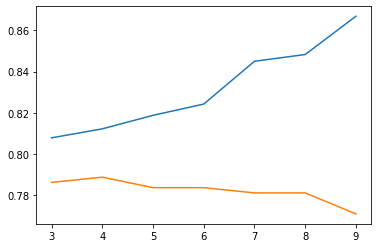

In [190]:
#의사결정나무
#참고 : https://datascienceschool.net/03%20machine%20learning/12.01%20%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.html
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

train_accuracy = []
predict_accuracy = []
for max_depth in range(3, 10):
    model = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth).fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, model.predict(X_train)))
    predict_accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    print(confusion_matrix(y_test, model.predict(X_test)))
    
plt.plot(range(3, 10), train_accuracy)
plt.plot(range(3, 10), predict_accuracy)
plt.show()

In [178]:
#랜덤포레스트

In [179]:
#로지스틱 회귀